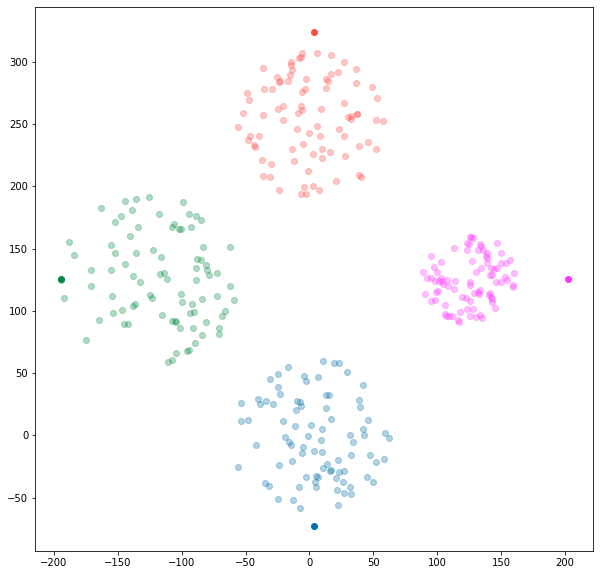

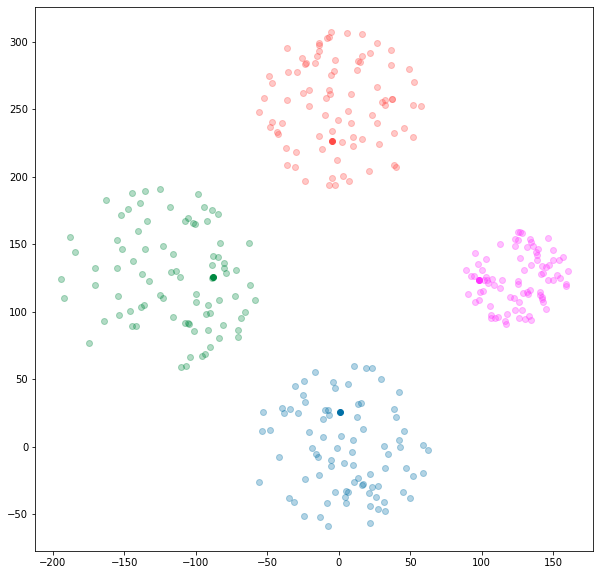

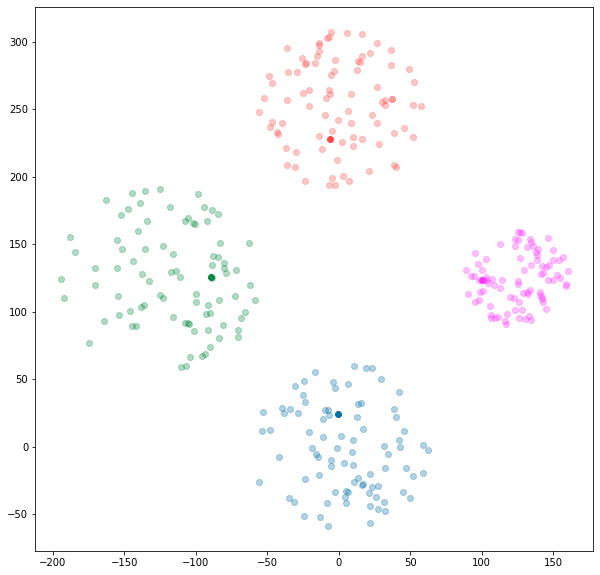

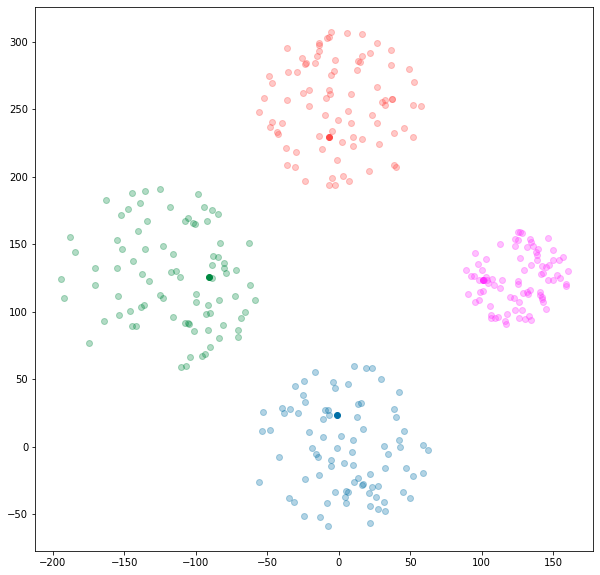

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y


class Cluster:
    def __init__(self, center, points=[]):
        self.center = center
        self.points = points

    def new_center(self):
        if len(self.points) <= 0:
            return
        x, y = 0, 0
        for point in self.points:
            x += point.x
            y += point.y
        self.center = Point(x / len(self.points), y / len(self.points))


n = 340
k = 4
colors = [
    "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
    "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
]


def distance(a, b):
    return np.sqrt((a.x - b.x) ** 2 + (a.y - b.y) ** 2)


def random_points(n, k):
    temp = []
    ces = get_centers([Point(0, 0), Point(0, 250)], k)
    for i in range(k):
        radius = int((0.5 + random.random()) * 70)
        for j in range(int(n / k)):
            r = radius * math.sqrt(random.random())
            alpha = 2 * math.pi * random.random()
            temp.append(Point(r * math.cos(alpha) + ces[i].x, r * math.sin(alpha) + ces[i].y))

    return temp


def get_centers(points, k):
    temp = list()
    x_s, y_s = 0, 0
    for point in points:
        x_s += point.x
        y_s += point.y
    x_s /= len(points)
    y_s /= len(points)
    center = Point(x_s, y_s)
    max_dist = 0
    for point in points:
        max_dist = max(max_dist, distance(point, center))

    for i in range(k):
        x_f = x_s + max_dist * math.cos(2 * i * np.pi / k)
        y_f = y_s + max_dist * math.sin(2 * i * np.pi / k)
        temp.append(Point(x_f, y_f))

    return temp


def draw_test(points, centers):
    plt.figure(figsize=(10, 10))
    px, py = list(), list()
    for point in points:
        px.append(point.x)
        py.append(point.y)
    plt.scatter(px, py, c='b')

    cx, cy = [], []
    for cluster in centers:
        cx.append(cluster.x)
        cy.append(cluster.y)
    plt.scatter(cx, cy, c='r')
    plt.show()


def draw(clusters, points, matrix):
    plt.figure(figsize=(10, 10))
    matrix_per_point = matrix.transpose()

    for p_i, point in enumerate(points):
        cluster_index = max([x for x in enumerate(matrix_per_point[p_i])], key=lambda x: x[1])[0]
        plt.scatter(point.x, point.y, c=colors[cluster_index], alpha=0.3)
    for c_i, cluster in enumerate(clusters):
        plt.scatter(cluster.center.x, cluster.center.y, c=colors[c_i])
    plt.show()


def get_matrix(points, clusters, m):
    matrix = np.zeros(shape=(len(clusters), len(points)))
    p = 2 / (m - 1)
    for p_i, point in enumerate(points):
        sum_t = sum([(1 / distance(point, temp.center)) ** p for temp in clusters])
        for c_i, cluster in enumerate(clusters):
            matrix[c_i][p_i] = ((1 / distance(point, cluster.center)) ** p) / sum_t
    return matrix


def get_centroids(points, clusters, matrix):
    for c_i, cluster in enumerate(clusters):
        sum_t = np.zeros(2)
        for p_i, point in enumerate(points):
            sum_t += np.array([point.x * matrix[c_i][p_i], point.y * matrix[c_i][p_i]])
        cluster.center = Point(sum_t[0] / sum(matrix[c_i]), sum_t[1] / sum(matrix[c_i]))


def check(matrix1, matrix2, e, n, k):
    for i in range(k):
        for j in range(n):
            if abs(matrix1[i][j] - matrix2[i][j]) > e: return True
    return False


def c_means(points, centers, m, e):
    clusters = list()
    for center in centers:
        clusters.append(Cluster(center))
    for point in points:
        cluster_temp = clusters[0]
        for cluster in clusters:
            if distance(point, cluster.center) < distance(point, cluster_temp.center):
                cluster_temp = cluster
        cluster_temp.points.append(point)
    matrix = get_matrix(points, clusters, m)
    draw(clusters, points, matrix)

    get_centroids(points, clusters, matrix)
    new_matrix = get_matrix(points, clusters, m)

    while check(matrix, new_matrix, e, n, k):
        matrix = new_matrix
        get_centroids(points, clusters, matrix)
        new_matrix = get_matrix(points, clusters, m)
        draw(clusters, points, matrix)


test_points = random_points(n, k)
clusters_t = get_centers(test_points, k)
c_means(test_points, clusters_t, 2, 0.01)